In [67]:
import pandas as pd

In [68]:
data_raw = pd.read_csv("companies_sorted.csv")
data_raw

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960
...,...,...,...,...,...,...,...,...,...,...,...
7173421,1494427,certiport vouchers,certiportvouchers.com,2011.0,information technology and services,1 - 10,NaN,NaN,linkedin.com/company/certiport-vouchers,0,1
7173422,1494429,black tiger fight club,blacktigerclub.com,2006.0,"health, wellness and fitness",1 - 10,"peking, beijing, china",china,linkedin.com/company/black-tiger-club-hero,0,6
7173423,4768462,catholic bishop of chicago,NaN,NaN,religious institutions,1 - 10,"inverness, illinois, united states",united states,linkedin.com/company/catholic-bishop-of-chicago,0,1
7173424,1494436,medexo robotics ltd,NaN,NaN,research,1 - 10,"london, london, united kingdom",united kingdom,linkedin.com/company/medexo-robotics-ltd,0,2


#### Dropping some columns that seems irrevelant for the limited EDA we are doing now

In [69]:
data = data_raw[['name', 'year founded', 'industry', 'size range', 'country']]
data

,name,year founded,industry,size range,country
0,ibm,1911.0,information technology and services,10001+,united states
1,tata consultancy services,1968.0,information technology and services,10001+,india
2,accenture,1989.0,information technology and services,10001+,ireland
3,us army,1800.0,military,10001+,united states
4,ey,1989.0,accounting,10001+,united kingdom
...,...,...,...,...,...
7173421,certiport vouchers,2011.0,information technology and services,1 - 10,NaN
7173422,black tiger fight club,2006.0,"health, wellness and fitness",1 - 10,china
7173423,catholic bishop of chicago,NaN,religious institutions,1 - 10,united states
7173424,medexo robotics ltd,NaN,research,1 - 10,united kingdom


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   name          object 
 1   year founded  float64
 2   industry      object 
 3   size range    object 
 4   country       object 
dtypes: float64(1), object(4)
memory usage: 273.6+ MB


#### Percentages of null values

In [71]:
data.isna().sum().sort_values(ascending=False) * 100 / len(data)

year founded    50.282529
country         32.748745
industry         4.042741
name             0.000042
size range       0.000000
dtype: float64

#### Given that the 'name' column is the natural candidate to be used as the primary key, we need to drop the records where name is null (3 records) and records with duplicate names

In [72]:
data = data[data['name'].notna()]

In [73]:
data.shape

(7173423, 5)

In [74]:
name_counts = data.name.value_counts()
name_counts.head(20)

independent consultant       69
consultant                   58
private practice             54
independent                  52
independent contractor       41
indépendant                  38
confidential                 35
autónomo                     33
private                      29
independiente                27
autônomo                     27
various                      25
profesional independiente    24
selbstständig                24
entrepreneur                 24
autonomo                     23
{displayname}                23
real estate                  22
selbständig                  22
law firm                     20
Name: name, dtype: int64

In [75]:
# we can see from above result that the duplicate names are not names of actual companies, so it's safe to drop them
data = data.drop_duplicates(subset=['name'], keep=False)

In [76]:
data.shape

(6862715, 5)

In [77]:
data.nunique()

name            6862715
year founded        232
industry            148
size range            8
country             236
dtype: int64

#### Cleaning up data based on the 'year founded' column

In [78]:
data.describe().transpose()

# some of the years mentioned are in the future 

,count,mean,std,min,25%,50%,75%,max
year founded,3408684.0,2001.974809,20.660571,1451.0,1999.0,2009.0,2013.0,2103.0


<AxesSubplot:>

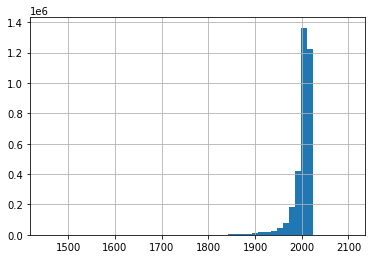

In [79]:
data['year founded'].hist(bins=50)

In [81]:
# let's exclude records where year > 2020 or < 1950 to eliminate bad data and outliers
data = data.loc[ ((data['year founded'] >= 1950) & (data['year founded'] <= 2020)) | data['year founded'].isna() ]

<AxesSubplot:>

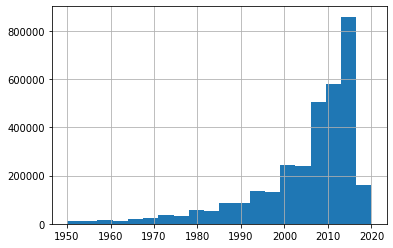

In [82]:
data['year founded'].hist(bins=20)

#### Exploring the relation between company name and company size and also between company name and company type (industry)
(Here we focus only on character count of the company names)

In [110]:
data['size range'].unique()

array(['10001+', '5001 - 10000', '1001 - 5000', '501 - 1000', '201 - 500',
       '51 - 200', '11 - 50', '1 - 10'], dtype=object)

In [142]:
# adding a new column for name lengh
data['name length'] = data['name'].str.len()
data

,name,year founded,industry,size range,country,name length
4,ey,1989.0,accounting,10001+,united kingdom,2
18,us navy,NaN,military,10001+,united states,7
30,mcdonald's corporation,1955.0,restaurants,10001+,united states,22
49,unitedhealth group,1980.0,hospital & health care,10001+,united states,18
50,huawei technologies,1987.0,telecommunications,10001+,china,19
...,...,...,...,...,...,...
7173421,certiport vouchers,2011.0,information technology and services,1 - 10,NaN,18
7173422,black tiger fight club,2006.0,"health, wellness and fitness",1 - 10,china,22
7173423,catholic bishop of chicago,NaN,religious institutions,1 - 10,united states,26
7173424,medexo robotics ltd,NaN,research,1 - 10,united kingdom,19


In [149]:
# company name length and company size
df = data.groupby('size range')['name length'].agg(['size', 'mean']).sort_values('mean')
df.columns = ['count of rows', 'mean']
df

# we see that names of bigger companies (5001+) have slightly smaller character length on average

,count of rows,mean
size range,,
10001+,855,17.180117
5001 - 10000,1620,18.250000
1001 - 5000,15569,20.021453
501 - 1000,20026,20.727554
1 - 10,5354981,20.967469
201 - 500,59731,21.078016
51 - 200,273100,21.259114
11 - 50,1031823,21.290374


In [150]:
# company name length and company type (industry)
df = data.groupby('industry')['name length'].agg(['size', 'mean']).sort_values('mean')
df.columns = ['count of rows', 'mean']
df

# we see that for instance tech companies have fewer characters in their names on average

,count of rows,mean
industry,,
internet,163300,15.315211
computer games,17451,15.894218
online media,28370,16.457949
apparel & fashion,61285,17.001779
computer software,179907,17.102714
...,...,...
legislative office,474,26.419831
government administration,29226,26.768528
public policy,6686,27.438080


#### Top 20 most common words used in company names broken down by company size

In [124]:
import string
from collections import Counter

compay_size_and_name = pd.DataFrame()
for size in data['size range'].unique():

  # limit records to the chosen "size range" (i.e. company size)
  data_subset = data.loc[data['size range'] == size]

  # put all the words used in all the company names in a list
  names_list = [ str(i).split() for i in list(data_subset.name) ]
  names_tokens = [ i for l in names_list for i in l]

  # get rid of punctuations characters and exclude the words ['the', 'and', 'for']
  cleanup_rule = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
  names_tokens = [ i.translate(cleanup_rule).replace(' ', '') for i in names_tokens if i not in ['the', 'and', 'for'] ]
  
  # get the top 20 most common words
  compay_size_and_name[size] = Counter([ i for i in names_tokens if len(i) > 2 ]).most_common(20)
  
compay_size_and_name

# we can see some trends. 
# E.g. the word 'solutions' is more common in smaller companes (rank 7 in size 1-200, rank 11 in size 201-500, rank 15 in size 501-1000, ...)

,10001+,5001 - 10000,1001 - 5000,501 - 1000,201 - 500,51 - 200,11 - 50,1 - 10
0,"(university, 39)","(university, 106)","(university, 640)","(ltd, 839)","(ltd, 2947)","(ltd, 16081)","(ltd, 64436)","(inc, 369158)"
1,"(health, 26)","(health, 59)","(ltd, 524)","(group, 784)","(group, 2432)","(inc, 14457)","(inc, 64405)","(ltd, 314168)"
2,"(group, 17)","(group, 51)","(group, 516)","(inc, 583)","(inc, 2347)","(group, 11347)","(group, 35483)","(llc, 224311)"
3,"(company, 17)","(bank, 42)","(inc, 376)","(university, 467)","(services, 1353)","(services, 6330)","(llc, 25749)","(limited, 210354)"
4,"(bank, 16)","(inc, 38)","(limited, 306)","(limited, 421)","(limited, 1241)","(limited, 5413)","(services, 23176)","(group, 129365)"
5,"(ltd, 16)","(ltd, 38)","(services, 303)","(services, 377)","(school, 1122)","(pvt, 4996)","(limited, 22610)","(services, 116513)"
6,"(limited, 16)","(limited, 32)","(bank, 300)","(college, 356)","(international, 1047)","(solutions, 4784)","(solutions, 20846)","(solutions, 104428)"
7,"(corporation, 14)","(services, 24)","(health, 287)","(international, 343)","(university, 1011)","(llc, 4703)","(pvt, 14676)","(consulting, 90667)"
8,"(international, 14)","(corporation, 23)","(international, 235)","(company, 324)","(pvt, 961)","(international, 4491)","(international, 14185)","(design, 63507)"
9,"(services, 11)","(international, 20)","(company, 229)","(health, 304)","(company, 959)","(company, 4221)","(company, 13240)","(gmbh, 61327)"
